In [ ]:
import sympy
from sympy import Eq, S, latex, plot_implicit, Matrix, symbols, simplify, expand, collect, solve, solveset
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
import matplotlib.pyplot as plt
%matplotlib inline

# Занятие 13
# Алгебра
### Задание 1.
Составить матрицу квадратичной формы $7x^2+10\sqrt{3}xy-3y^2−20z^2$, проверить, что она определяет именно заданное уравнение. Найти и вывести на экран собственные числа и собственные векторы матрицы квадратичной формы. 

In [ ]:
from sympy.abc import x, y, z
q = 7*x**2 + 10*sympy.sqrt(3)*x*y - 3*y**2 - 20*z**2
Q = Matrix([[7, 10*sympy.sqrt(3)/2, 0], [10*sympy.sqrt(3)/2, -3, 0], [0, 0, -20]])
display(Q)

X = Matrix([x, y, z])
res = simplify(expand(X.T*Q*X))
display(X, res, res[0] - q)

ev = Q.eigenvects()
P = Matrix([])

for item in ev:
  degree = item[1]
  print('собственное число', item[0], 'кратность', degree, 'собственный вектор')
  for i in range(degree):
    e_i = item[2][i]
    display(e_i)
    P = P.row_join(e_i.normalized())

Matrix([
[        7, 5*sqrt(3),   0],
[5*sqrt(3),        -3,   0],
[        0,         0, -20]])

Matrix([
[x],
[y],
[z]])

Matrix([[7*x**2 + 10*sqrt(3)*x*y - 3*y**2 - 20*z**2]])

0

собственное число -20 кратность 1 собственный вектор


Matrix([
[0],
[0],
[1]])

собственное число -8 кратность 1 собственный вектор


Matrix([
[-sqrt(3)/3],
[         1],
[         0]])

собственное число 12 кратность 1 собственный вектор


Matrix([
[sqrt(3)],
[      1],
[      0]])

### Задание 2.
Привести квадратичную форму Примера 1 к каноническому виду с помощью перехода к новому базису из собственных векторов.

In [ ]:
display(q, Q, P)
Q_new = P.T*Q*P
display(simplify(Q_new))

X = Matrix([x, y, z])
res = simplify(expand(X.T*Q_new*X))[0]
display(res)

7*x**2 + 10*sqrt(3)*x*y - 3*y**2 - 20*z**2

Matrix([
[        7, 5*sqrt(3),   0],
[5*sqrt(3),        -3,   0],
[        0,         0, -20]])

Matrix([
[0,      -1/2, sqrt(3)/2],
[0, sqrt(3)/2,       1/2],
[1,         0,         0]])

Matrix([
[-20,  0,  0],
[  0, -8,  0],
[  0,  0, 12]])

-20*x**2 - 8*y**2 + 12*z**2

### Задание 3.
Определить тип кривой второго порядка, заданной уравнением
$$
97x^2 - 144xy + 97y^2 + 482x - 532y = 3452
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика. 

Matrix([
[ 97,  -72,   241],
[-72,   97,  -266],
[241, -266, -3452]])

Matrix([
[x],
[y],
[1]])

Eq(97*x**2 - 144*x*y + 482*x + 97*y**2 - 532*y - 3452, 0)

Matrix([
[sqrt(2)/2, -sqrt(2)/2, 0],
[sqrt(2)/2,  sqrt(2)/2, 0],
[        0,          0, 1]])

Matrix([
[           25,              0,  -25*sqrt(2)/2],
[            0,            169, -507*sqrt(2)/2],
[-25*sqrt(2)/2, -507*sqrt(2)/2,          -3452]])

Matrix([
[  X + sqrt(2)/2],
[Y + 3*sqrt(2)/2],
[              1]])

25*X**2 + 169*Y**2 - 4225

Eq(x**2/169 + y**2/25, 1)

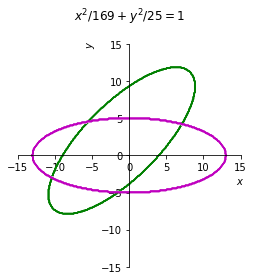

In [ ]:
A3 = Matrix([[97, -72, 241], [-72, 97, -266], [241, -266, -3452]])
X3 = Matrix([x, y, 1])
display(A3, X3)

eq3 = Eq(simplify(expand(X3.transpose()*A3*X3))[0], 0)
display(eq3)

alpha = sympy.acot((A3[0, 0] - A3[1, 1])/(2*A3[0, 1]))/2
P = Matrix([[Cos(alpha), -Sin(alpha), 0], [Sin(alpha), Cos(alpha), 0], [0, 0, 1]])
display(P)

A3 = simplify(expand((P.transpose()*A3*P)))
display(A3)

from sympy.abc import X, Y, Z
X3 = Matrix((X, Y, 1)) 
simplify(expand((X3.T*A3*X3)[0]))
X3_new = Matrix((X - A3[0, 2]/A3[0, 0], Y - A3[1, 2]/A3[1, 1], 1))
eq3_new = simplify(expand(X3_new.T*A3*X3_new))[0]
display(X3_new, eq3_new)

free = eq3_new.subs({X: 0, Y: 0})
eq3_last = eq3_new/(-free) + 1
Eq(eq3_last, 1)

eq3_last_xy = Eq(eq3_last.subs({X: x, Y: y}), 1)
display(eq3_last_xy)

p = plot_implicit(eq3, (x, -15, 15), (y, -15, 15), line_color='g', aspect_ratio=(1, 1), xlabel='$x$', ylabel='$y$', title=latex(eq3_last_xy, mode='inline') + '\n', adaptive=False, show=False)
p.extend(plot_implicit(eq3_last_xy, (x, -15, 15), (y, -20, 20), line_color='m', aspect_ratio=(1, 1), adaptive=False, show=False)) 
p.show()

### Задание 4.
Определить тип кривой второго порядка, заданной уравнением
$$
x^2+2xy+y^2-4x+4y=4
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика. 

Указание: каноническое уравнение параболы $y^2 = 2px$ или $x^2 = 2py$; для того, чтобы выразить $x$ или $y$ можно воспользоваться solve или solveset.

Matrix([
[ 1, 1, -2],
[ 1, 1,  2],
[-2, 2, -4]])

Matrix([
[x],
[y],
[1]])

Eq(x**2 + 2*x*y - 4*x + y**2 + 4*y - 4, 0)

Matrix([
[sqrt(2)/2, -sqrt(2)/2, 0],
[sqrt(2)/2,  sqrt(2)/2, 0],
[        0,          0, 1]])

Matrix([
[2,         0,         0],
[0,         0, 2*sqrt(2)],
[0, 2*sqrt(2),        -4]])

2*X**2 + 4*sqrt(2)*Y - 4

Matrix([
[            X],
[Y + sqrt(2)/2],
[            1]])

2*X**2 + 4*sqrt(2)*Y

Eq(2*x**2 + 4*sqrt(2)*y, 0)

-2*sqrt(2)*y

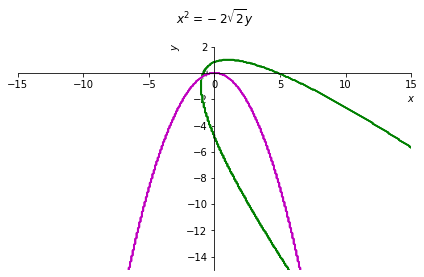

In [ ]:
A3 = Matrix([[1, 1, -2], [1, 1, 2], [-2, 2, -4]])
X3 = Matrix([x, y, 1])
display(A3, X3)

eq3 = Eq(simplify(expand(X3.transpose()*A3*X3))[0], 0)
display(eq3)

alpha = sympy.acot((A3[0, 0] - A3[1, 1])/(2*A3[0, 1]))/2
P = Matrix([[Cos(alpha), -Sin(alpha), 0], [Sin(alpha), Cos(alpha), 0], [0, 0, 1]])
display(P)

A3 = simplify(expand((P.transpose()*A3*P)))
display(A3)

from sympy.abc import X, Y, Z
X3 = Matrix((X, Y, 1)) 
display(simplify(expand((X3.T*A3*X3)[0])))
X3_new = Matrix((X, Y + 2 ** (S(1) / 2) / 2, 1))
eq3_new = simplify(expand(X3_new.T*A3*X3_new))[0]
display(X3_new, eq3_new)

eq3_last_xy = Eq(eq3_new.subs({X: x, Y: y}), 0)
display(eq3_last_xy)
right = solve(eq3_last_xy, x**2)[0]
display(right)

p = plot_implicit(eq3, (x, -15, 15), (y, -15, 2), line_color='g', aspect_ratio=(1, 1), xlabel='$x$', ylabel='$y$', title=latex(Eq(x**2, right), mode='inline') + '\n', adaptive=False, show=False)
p.extend(plot_implicit(eq3_last_xy, (x, -15, 15), (y, -20, 2), line_color='m', aspect_ratio=(1, 1), adaptive=False, show=False)) 
p.show()

###  Индивидуальное задание
Составить матрицу квадратичной формы и привести ее к каноническому виду с помощью перехода к новому базису из собственных векторов. Векторы выводить на экран не нужно. Вывести на экран матрицу в исходном виде и канонической форме, а также саму квадратичную форму в каноническом виде.

Вариант N 92

$$Q = 2336 x^{2} + 60 \sqrt{11} x y + 164 \sqrt{21} x z - 975 y^{2} - 30 \sqrt{231} y z + 1639 z^{2}$$

In [ ]:
from sympy.abc import x, y, z
Qi = Matrix([[2336, S(60*sympy.sqrt(11))/2, S(164*sympy.sqrt(21))/2], [S(60*sympy.sqrt(11))/2, -975, S(-30*sympy.sqrt(231))/2], [S(164*sympy.sqrt(21))/2, S(-30*sympy.sqrt(231))/2, 1639]])

ev = Qi.eigenvects()
Pind = Matrix([])

for item in ev:
  degree = item[1]
  for i in range(degree):
    e_i = item[2][i]
    Pind = Pind.row_join(e_i.normalized())

Q_new = Pind.T*Qi*Pind

X = Matrix([x, y, z])
res = simplify(expand(X.T*Q_new*X))[0]

display(Qi, Pind, simplify(Q_new), res)

Matrix([
[       2336,   30*sqrt(11),   82*sqrt(21)],
[30*sqrt(11),          -975, -15*sqrt(231)],
[82*sqrt(21), -15*sqrt(231),          1639]])

Matrix([
[        -1/25, -3*sqrt(11)/25, sqrt(21)/5],
[3*sqrt(11)/10,          -1/10,          0],
[  sqrt(21)/50, 3*sqrt(231)/50,        2/5]])

Matrix([
[-1000,    0,    0],
[    0, 1500,    0],
[    0,    0, 2500]])

-1000*x**2 + 1500*y**2 + 2500*z**2